<a href="https://colab.research.google.com/github/P-Dhanush/VaR-methods-in-Crypto/blob/main/VaR-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests pandas matplotlib

In [ ]:
import requests

url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"


# GOT THE ABOVE URL REQUEST AT PUBLIC API DOCUMENTATION OF COINGECKO

params = {
    'vs_currency': 'usd',
    'from': 1367107200,  # Start timestamp in seconds
    'to': 1660521600,    # End timestamp in seconds
    'precision': 0
}

response = requests.get(url, params=params)
data = response.json()

closing_prices = [price[1] for price in data['prices']]

print("Closing prices:")
for timestamp, price in zip(data['prices'], closing_prices):
    print(f"{timestamp[0]}: {price} USD")


Closing prices:
1367107200000: 135 USD
1367193600000: 142 USD
1367280000000: 135 USD
1367366400000: 117 USD
1367452800000: 103 USD
1367539200000: 91 USD
1367625600000: 111 USD
1367712000000: 117 USD
1367798400000: 118 USD
1367884800000: 106 USD
1367971200000: 113 USD
1368057600000: 113 USD
1368144000000: 119 USD
1368230400000: 113 USD
1368316800000: 115 USD
1368403200000: 117 USD
1368489600000: 115 USD
1368576000000: 114 USD
1368662400000: 116 USD
1368748800000: 123 USD
1368835200000: 124 USD
1368921600000: 121 USD
1369008000000: 123 USD
1369094400000: 123 USD
1369180800000: 123 USD
1369267200000: 126 USD
1369353600000: 132 USD
1369440000000: 131 USD
1369526400000: 135 USD
1369612800000: 129 USD
1369699200000: 129 USD
1369785600000: 132 USD
1369872000000: 127 USD
1369958400000: 128 USD
1370044800000: 129 USD
1370131200000: 121 USD
1370217600000: 121 USD
1370390400000: 121 USD
1370476800000: 122 USD
1370563200000: 119 USD
1370649600000: 110 USD
1370736000000: 108 USD
1370822400000: 100 

In [ ]:
import numpy as np
# Calculate logarithmic returns
log_returns = [np.log(price) - np.log(closing_prices[i - 1]) for i, price in enumerate(closing_prices[1:])]

print("\nLogarithmic returns:")
for i, log_return in enumerate(log_returns):
    date = timestamp[0] / 1000  # Timestamp of the last closing price
    print(f"{date}: {log_return}")

# Store logarithmic returns in a list

# You can use 'log_returns' for further analysis or storage
print("\nStored logarithmic returns:")
print(log_returns)


Logarithmic returns:
1660521600.0: -5.142939408100772
1660521600.0: 0.0
1660521600.0: -0.19365312280350455
1660521600.0: -0.27054579020879377
1660521600.0: -0.25131442828090655
1660521600.0: 0.07480121308269805
1660521600.0: 0.25131442828090655
1660521600.0: 0.061154423153331194
1660521600.0: -0.09873484068568938
1660521600.0: -0.043296805753324286
1660521600.0: 0.0639487246002739
1660521600.0: 0.0517356743991888
1660521600.0: 0.0
1660521600.0: -0.03419136474827944
1660521600.0: 0.034786116085415486
1660521600.0: 0.0
1660521600.0: -0.02597548640326064
1660521600.0: 0.008658062743114314
1660521600.0: 0.0759859069779214
1660521600.0: 0.06669137449867257
1660521600.0: -0.016393809775675727
1660521600.0: -0.00809721023262
1660521600.0: 0.016393809775675727
1660521600.0: 0.0
1660521600.0: 0.024097551579060905
1660521600.0: 0.07061756721395351
1660521600.0: 0.03891541624967321
1660521600.0: 0.022472855852059048
1660521600.0: -0.015384918839479234
1660521600.0: -0.04546237407675768
166052160

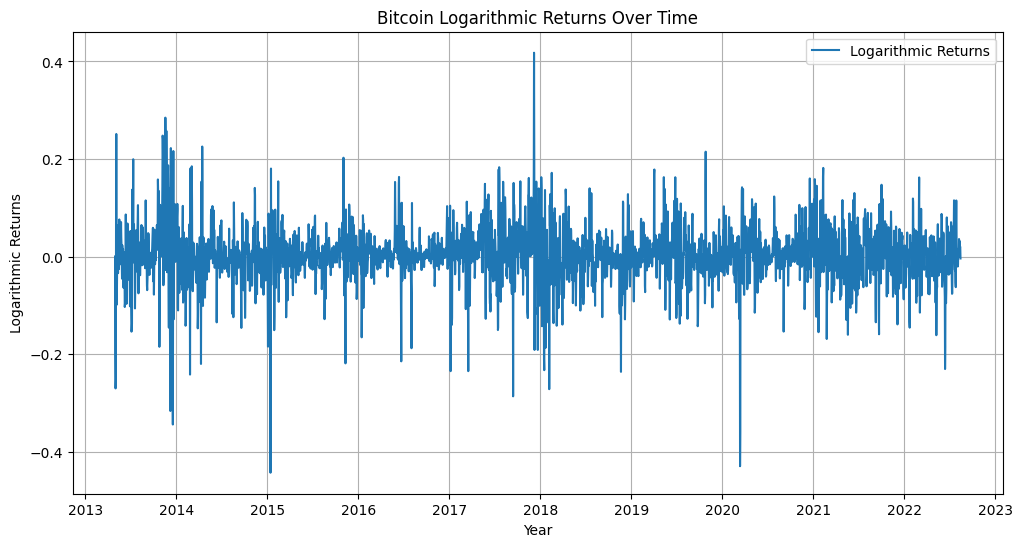

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime


# log_returns = [log_return1, log_return2, ...]
# timestamps = [timestamp1, timestamp2, ...]

# Convert timestamps to datetime objects
timestamps = [datetime.utcfromtimestamp(timestamp[0] / 1000) for timestamp in data['prices'][1:]]

# Neglect the first entry in log returns
log_returns = log_returns[1:]
timestamps = timestamps[1:]

# Plot logarithmic returns with time
plt.figure(figsize=(12, 6))
plt.plot(timestamps, log_returns, label='Logarithmic Returns')
plt.title('Bitcoin Logarithmic Returns Over Time')
plt.xlabel('Year')
plt.ylabel('Logarithmic Returns')
plt.legend()
plt.grid(True)
plt.show()


# **STATISTICS FOR BTC**

In [ ]:
import numpy as np
from scipy.stats import skew,kurtosis

bitcoin_log_returns = log_returns


def calculate_statistics(log_returns, label):
    # Check if log_returns is not empty
    if not log_returns:
        print(f"No data available for {label}.")
        return

    stats = {
        'Minimum': np.min(log_returns),
        'Maximum': np.max(log_returns),
        '1st Quartile': np.percentile(log_returns, 25),
        '3rd Quartile': np.percentile(log_returns, 75),
        'Mean': np.mean(log_returns),
        'Median': np.median(log_returns),
        'Sum': np.sum(log_returns),
        'Variance': np.var(log_returns),
        'Stdev': np.std(log_returns),
        'Skewness': skew(log_returns),
        'Kurtosis': kurtosis(log_returns)
    }

    print(f"{label} Statistics:")
    for key, value in stats.items():
        print(f"{key}: {value}")
    print()

# Calculate statistics for Bitcoin
calculate_statistics(bitcoin_log_returns, 'Bitcoin')




Bitcoin Statistics:
Minimum: -0.4434925036974038
Maximum: 0.41798159715311733
1st Quartile: -0.022090957814191903
3rd Quartile: 0.02959419191130408
Mean: 0.0030478619256193184
Median: 0.0034284542259150896
Sum: 10.341395513626347
Variance: 0.0033928297583580547
Stdev: 0.05824800218340587
Skewness: -0.3944992110858868
Kurtosis: 5.942624452458849



# **GARCH PARAMETERS**



In [ ]:
import pandas as pd
!pip install arch
import arch
from scipy.stats import norm

# Bitcoin GARCH(1,1) model
bitcoin_data = log_returns
bitcoin_model = arch.arch_model(bitcoin_data, vol='Garch', p=1, q=1)
bitcoin_result = bitcoin_model.fit()

# Print the results summary
print("Bitcoin GARCH(1,1) Model:")
print(bitcoin_result.summary())

# Calculate Daily Volatility Forecast (Dσt+1)
daily_volatility_forecast = bitcoin_result.conditional_volatility[-1]

# Calculate 1-day ahead Value-at-Risk (VaRt+1)
confidence_level_1day = 0.95
bitcoin_var_1day = daily_volatility_forecast * norm.ppf(confidence_level_1day)

# Calculate 10-day ahead Value-at-Risk (VaRt+10)
horizon = 10
confidence_level_10days = 0.95
bitcoin_var_10days = daily_volatility_forecast * (horizon ** 0.5) * norm.ppf(confidence_level_10days)

# Print the results
print("\nCalculated Parameters:")
print(f"Dσt+1: {daily_volatility_forecast:.5f}")
print(f"VaRt+1: {bitcoin_var_1day:.5f}")
print(f"VaRt+10: {bitcoin_var_10days:.5f}")
'''
We fit the GARCH model to the entire time series data (bitcoin_data) to estimate the model parameters. Therefore, the resulting parameters, including Dσt+1 (Daily Volatility Forecast), VaRt+1 (1-day ahead Value-at-Risk), and VaRt+10 (10-day ahead Value-at-Risk), correspond to the latest data point in your time series.

Dσt+1 (Daily Volatility Forecast):

Corresponds to the forecasted volatility for the next trading day based on the GARCH(1,1) model using the latest available information in your time series.
VaRt+1 (1-day ahead Value-at-Risk):

Corresponds to the 1-day ahead VaR based on the latest volatility forecast and the specified confidence level.
VaRt+10 (10-day ahead Value-at-Risk):

Corresponds to the 10-day ahead VaR based on the latest volatility forecast and the specified confidence level.
'''


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 6.9 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.003393. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 47228368.242637
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1646635.0919319845
Iteration:      3,   Func. Count:     30,   Neg. LLF: 16124.14160624754
Iteration:      4,   Func. Count:     40,   Neg. LLF: 12682996966.624224
Iteration:      5,   Func. Count:     53,   Neg. LLF: 1490083.8802664531
Iteration:      6,   Func. Count:     64,   Neg. LLF: 2.2322384171215885e+17
Iteration:      7,   Func. Count:     76,   Neg. LLF: 19460860.68421321
Optimization terminated successfully    (Exit mode 0)
            Current function value: -5383.973990471538
            Iterations: 8
            Function evaluations: 86
            Gradient evaluations: 7
Bitcoin GARCH(1,1) Model:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:         

'\nWe fit the GARCH model to the entire time series data (bitcoin_data) to estimate the model parameters. Therefore, the resulting parameters, including Dσt+1 (Daily Volatility Forecast), VaRt+1 (1-day ahead Value-at-Risk), and VaRt+10 (10-day ahead Value-at-Risk), correspond to the latest data point in your time series.\n\nDσt+1 (Daily Volatility Forecast):\n\nCorresponds to the forecasted volatility for the next trading day based on the GARCH(1,1) model using the latest available information in your time series.\nVaRt+1 (1-day ahead Value-at-Risk):\n\nCorresponds to the 1-day ahead VaR based on the latest volatility forecast and the specified confidence level.\nVaRt+10 (10-day ahead Value-at-Risk):\n\nCorresponds to the 10-day ahead VaR based on the latest volatility forecast and the specified confidence level.\n'

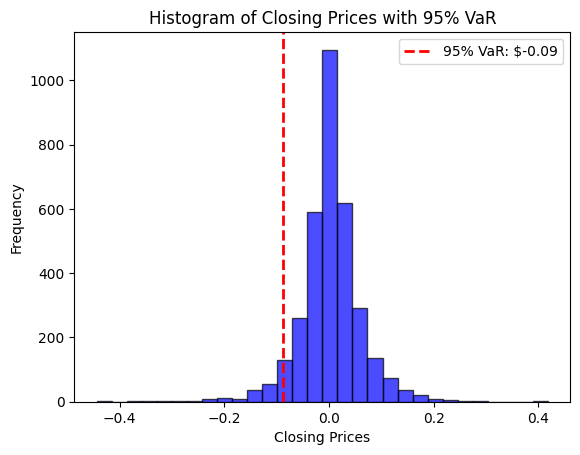

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# the quantile (95% historical VaR)
quantile = 0.95
#mod_quantile = 0.95

# Calculate historical VaR
historical_var = np.percentile(log_returns, 100 - quantile * 100)
#mod_var = np.percentile(log_returns, 100 - mod_quantile * 100)

# Plot histogram
plt.hist(log_returns, bins=30, alpha=0.7, color='blue', edgecolor='black')

# Add a vertical line for the VaR
plt.axvline(historical_var, color='red', linestyle='dashed', linewidth=2, label=f'95% VaR: ${historical_var:.2f}')
#plt.axvline(mod_var, color='green', linestyle='dashed', linewidth=2, label=f'{mod_quantile * 100}% Mod VaR: ${mod_var:.2f}')

# Add labels and title
plt.xlabel('Closing Prices')
plt.ylabel('Frequency')
plt.title('Histogram of Closing Prices with 95% VaR')

# Add a legend
plt.legend()

# Show the plot
plt.show()


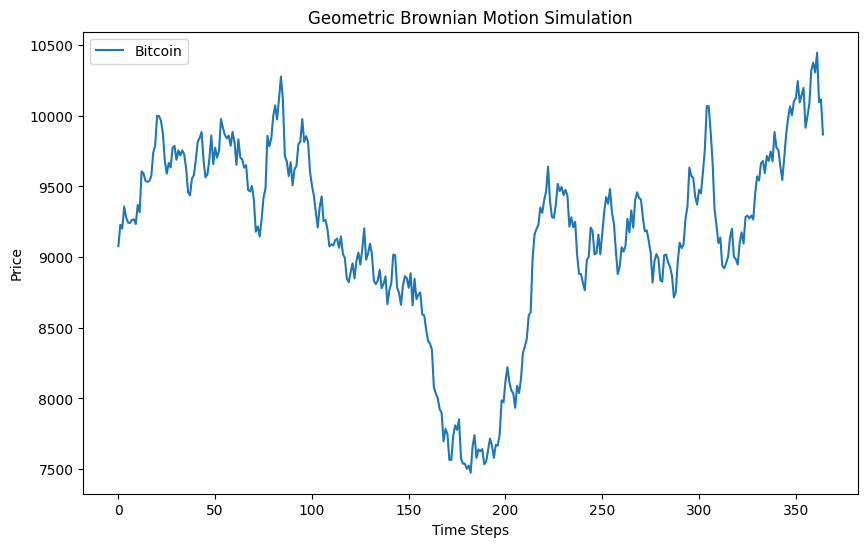

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def geometric_brownian_motion(N, sigma, mu, P0):
    Wt = np.cumsum(np.random.normal(0, 1, N))
    t = np.arange(1, N + 1) / 365
    drift = (mu - 0.5 * sigma**2) * t
    diff = sigma * Wt
    Pt = P0 * np.exp(drift + diff)
    return Pt

# Parameters
N = 365  # Number of time steps
# Calculate sigma (volatility) and mu (average return)
mu = np.mean(log_returns[-10:])
sigma = np.std(log_returns[-10:])
'''
print(f"Estimated sigma: {sigma}")
print(f"Estimated mu: {mu}")
'''

# GETTING P0_bitcoin:
def P0_btc(date):
    url = f"https://api.coingecko.com/api/v3/coins/bitcoin/history?date={date}&localization=false"
    response = requests.get(url)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse JSON data
        data_for_gbm = response.json()

        # Access the required information (e.g., closing price)
        closing_price = data_for_gbm['market_data']['current_price']['usd']

        return closing_price
    else:
        print(f"Failed to retrieve data. Status code: {response.status_code}")


date = "11-11-2019"
P0_bitcoin = P0_btc(date)

# Run simulation for Bitcoin
bitcoin_path = geometric_brownian_motion(N, sigma, mu, P0_bitcoin)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(bitcoin_path, label='Bitcoin')
plt.title('Geometric Brownian Motion Simulation')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()



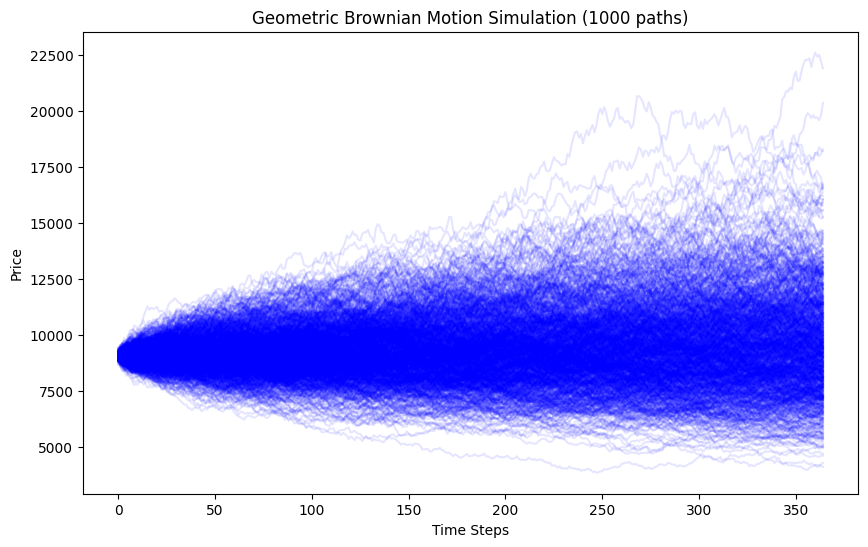

In [ ]:
num_simulations = 1000  # Number of simulations
# Run 1000 simulations for Bitcoin
bitcoin_paths = [geometric_brownian_motion(N, sigma, mu, P0_bitcoin) for _ in range(num_simulations)]

# Plot the results
plt.figure(figsize=(10, 6))
for path in bitcoin_paths:
    plt.plot(path, alpha=0.1, color='blue')

plt.title('Geometric Brownian Motion Simulation (1000 paths)')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.show()



In [ ]:
# Calculate logarithmic returns
log_returns_simulations = [np.log(Pt[1:] / Pt[:-1]) for Pt in bitcoin_paths]

# Calculate VaR at 95% quantile for 1-day horizon in log returns
var_1_day_log_returns = np.percentile(np.concatenate(log_returns_simulations), 95)

# Calculate VaR at 95% quantile for 10-day horizon in log returns
var_10_day_log_returns = np.percentile(np.concatenate(log_returns_simulations) * np.sqrt(10), 95)

# Convert VaR values back to prices
var_1_day = P0_bitcoin * np.exp(var_1_day_log_returns)
var_10_day = P0_bitcoin * np.exp(var_10_day_log_returns)

# Print VaR values
print(f"VaR at 1-day horizon: {var_1_day}")
print(f"VaR at 10-day horizon: {var_10_day}")

VaR at 1-day horizon: 9238.784731389349
VaR at 10-day horizon: 9675.181599348693


In [ ]:
import requests
import time



# Define the URL and parameters
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"
params = {
    'vs_currency': 'usd',
    'from': 1573430400 + 86400,  # Start timestamp in seconds (one day after the previous end timestamp)
    'to': 1573430400+10*86400,  # End timestamp in seconds (current timestamp)
    'precision': 0
}

# Send the request and get the response
response = requests.get(url, params=params)
data = response.json()

# Extract the closing prices
new_closing_prices = [price[1] for price in data['prices']]

# Append the new closing prices to the existing ones
closing_prices += new_closing_prices


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from arch import arch_model

rescale=False

# Function to calculate GBM VaR
def GBM_var(log_returns, P0):
    N = 365  # Number of time steps
    mu = np.mean(log_returns)
    sigma = np.std(log_returns)
    Wt = np.cumsum(np.random.normal(0, 1, N))
    t = np.arange(1, N + 1) / 365
    drift = (mu - 0.5 * sigma**2) * t
    diff = sigma * Wt
    Pt = P0 * np.exp(drift + diff)
    log_returns_simulations = [np.log(Pt[1:] / Pt[:-1]) for Pt in bitcoin_paths]
    var_1_day_log_returns = np.percentile(np.concatenate(log_returns_simulations), 95)
    var_1_day = P0 * np.exp(var_1_day_log_returns)
    return var_1_day

# Function to calculate GARCH VaR
def GARCH_var(log_returns, P0):
    model = arch_model(log_returns, vol='Garch', p=1, q=1)
    result = model.fit(disp='off')
    daily_volatility_forecast = result.conditional_volatility[-1]
    bitcoin_var_1day = daily_volatility_forecast * norm.ppf(0.95)
    bitcoin_var_1day_dollars = bitcoin_var_1day * P0
    return bitcoin_var_1day_dollars

# Function to calculate Historical VaR
def historical_var(log_returns, P0):
    var = np.percentile(log_returns, 5)
    return var * P0

# Function to calculate using Monte Carlo Simulations
def MC_var(log_returns, P0, num_simulations=1000):
    N = 365  # Number of time steps
    mu = np.mean(log_returns)
    sigma = np.std(log_returns)
    simulations = []
    for _ in range(num_simulations):
        Wt = np.cumsum(np.random.normal(0, 1, N))
        t = np.arange(1, N + 1) / 365
        drift = (mu - 0.5 * sigma**2) * t
        diff = sigma * Wt
        Pt = P0 * np.exp(drift + diff)
        simulations.append(Pt)
    log_returns_simulations = [np.log(Pt[1:] / Pt[:-1]) for Pt in simulations]
    var_1_day_log_returns = np.percentile(np.concatenate(log_returns_simulations), 95)
    var_1_day = P0 * np.exp(var_1_day_log_returns)
    return var_1_day


# Calculate VaR for each of the previous 400 days
historical_VaR = []
GBM_VaR = []
GARCH_VaR = []
MC_VaR = []
for i in range(400, 0, -1):
    log_returns_mod = log_returns[-i-365:-i]
    P0 = closing_prices[-i-1]
    historical_VaR.append(historical_var(log_returns_mod, P0))
    GBM_VaR.append(GBM_var(log_returns_mod, P0))
    GARCH_VaR.append(GARCH_var(log_returns_mod, P0))
    MC_VaR.append(MC_var(log_returns_mod, P0))  # Monte Carlo VaR


# Convert lists to numpy arrays
historical_VaR = np.array(historical_VaR)
GBM_VaR = np.array(GBM_VaR)
GARCH_VaR = np.array(GARCH_VaR)
MC_VaR = np.array(MC_VaR)

# Calculate the empirical loss for each day
empirical_losses = -np.diff(np.log(closing_prices[-402:-1])) * closing_prices[-402:-2]



# Backtest each VaR calculation
models = [historical_VaR, GBM_VaR,MC_VaR, GARCH_VaR]
model_names = ['Historical', 'GBM','Monte Carlo', 'GARCH']

for VaR, name in zip(models, model_names):
    exceedances = np.sum(empirical_losses > VaR)
    total_days = len(empirical_losses)
    print(f"{name} VaR exceedances: {exceedances} out of {total_days} days ({100*exceedances/total_days:.2f}%)")
    exceedance_or_shortfall = empirical_losses - VaR
    percentage_exceedance_or_shortfall = 100 * exceedance_or_shortfall / VaR
    print(f"{name} percentage of exceedance or shortfall: {percentage_exceedance_or_shortfall}%")


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002946. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002946. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning:

Historical VaR exceedances: 399 out of 400 days (99.75%)
Historical percentage of exceedance or shortfall: [ -133.5282492   -105.34744476  -100.1966187    -89.27838774
   -49.52228388  -113.84028922  -206.67999556  -114.59747086
   -96.46264751  -152.83989925  -147.45541314   -61.1409114
  -131.03144971   -69.74741096   -71.58934431  -106.88003988
  -141.04345229    39.06500193   -67.50153331  -112.9932391
  -142.3001574   -203.72026311   -92.11848353  -131.89729571
  -111.49193123   -80.04457465   -11.72308222  -178.06709979
  -121.39534859   -96.07200443  -133.39894706   -46.94255362
  -110.21015006   -48.33175402  -104.75556687   -76.55567143
   -89.78192285  -126.70627659  -106.40345246   -63.10023201
   -88.96296465   -69.77273178   -89.44823864   -95.23780327
   -45.3594035    -92.95136469   -88.45587165  -110.02607055
  -140.67311065   -81.12503419  -111.12995943   -84.94390771
   -95.22496107  -125.96561591  -168.76354798   -90.94660175
  -136.1797747    -85.95619821  -115.6138

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002555. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


We have tested VaR on the last 400 days. From the above results we observe:



1.   HISTORICAL VaR: exceeded 392 out of 400 days.
2.   GARCH VaR : exceeded 8 out of 400 days.
3.   GBM VaR : exceeded 0 out of 400 days.



Historical VaR exceedances: 399 out of 400 days (99.75%)
Historical percentage of exceedance or shortfall: [ -133.5282492   -105.34744476  -100.1966187    -89.27838774
   -49.52228388  -113.84028922  -206.67999556  -114.59747086
   -96.46264751  -152.83989925  -147.45541314   -61.1409114
  -131.03144971   -69.74741096   -71.58934431  -106.88003988
  -141.04345229    39.06500193   -67.50153331  -112.9932391
  -142.3001574   -203.72026311   -92.11848353  -131.89729571
  -111.49193123   -80.04457465   -11.72308222  -178.06709979
  -121.39534859   -96.07200443  -133.39894706   -46.94255362
  -110.21015006   -48.33175402  -104.75556687   -76.55567143
   -89.78192285  -126.70627659  -106.40345246   -63.10023201
   -88.96296465   -69.77273178   -89.44823864   -95.23780327
   -45.3594035    -92.95136469   -88.45587165  -110.02607055
  -140.67311065   -81.12503419  -111.12995943   -84.94390771
   -95.22496107  -125.96561591  -168.76354798   -90.94660175
  -136.1797747    -85.95619821  -115.6138

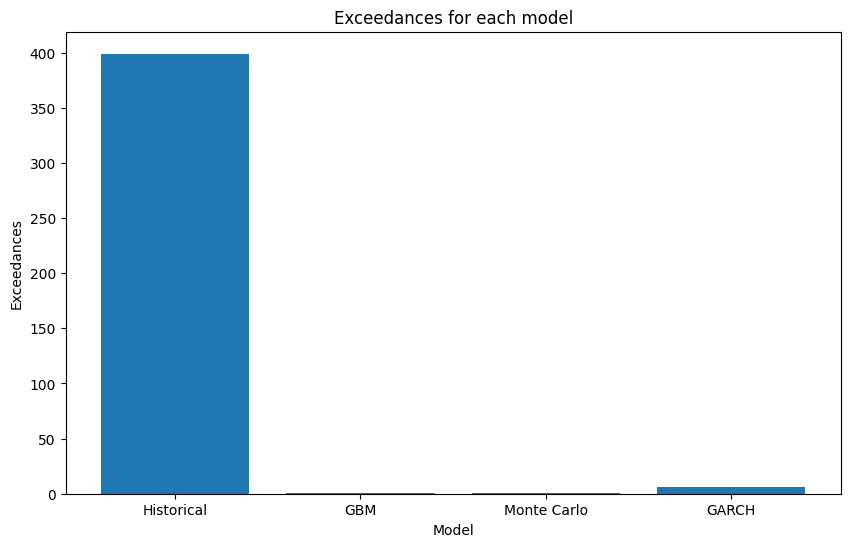

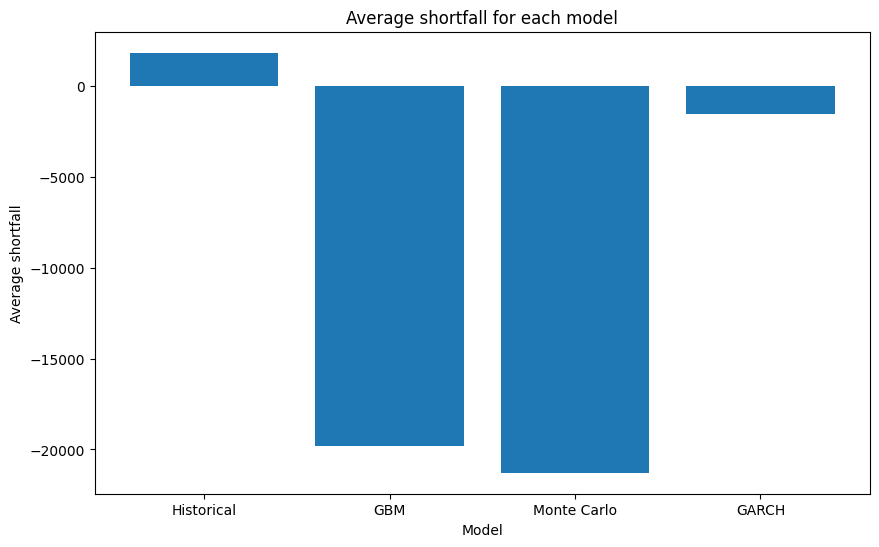

In [ ]:
exceedances_list = []
shortfalls_list = []
for VaR, name in zip(models, model_names):
    exceedances = np.sum(empirical_losses > VaR)
    exceedances_list.append(exceedances)
    total_days = len(empirical_losses)
    print(f"{name} VaR exceedances: {exceedances} out of {total_days} days ({100*exceedances/total_days:.2f}%)")
    exceedance_or_shortfall = empirical_losses - VaR
    shortfalls_list.append(exceedance_or_shortfall)
    percentage_exceedance_or_shortfall = 100 * exceedance_or_shortfall / VaR
    print(f"{name} percentage of exceedance or shortfall: {percentage_exceedance_or_shortfall}%")
exceedances_array = np.array(exceedances_list)
print(f"Mean exceedances: {np.mean(exceedances_array)}")
print(f"Median exceedances: {np.median(exceedances_array)}")
print(f"Standard deviation of exceedances: {np.std(exceedances_array)}")
import matplotlib.pyplot as plt

# Plot exceedances
plt.figure(figsize=(10, 6))
plt.bar(model_names, exceedances_list)
plt.xlabel('Model')
plt.ylabel('Exceedances')
plt.title('Exceedances for each model')
plt.show()

# Plot shortfalls
plt.figure(figsize=(10, 6))
plt.bar(model_names, [np.mean(shortfall) for shortfall in shortfalls_list])
plt.xlabel('Model')
plt.ylabel('Average shortfall')
plt.title('Average shortfall for each model')
plt.show()


In [ ]:
for shortfall in shortfalls_list : print(np.mean(shortfall))

1819.1861349530495
-19830.872627019628
-21280.0494621295
-1541.467217966031
